## 계층적 군집
#### <img src='./img/hierarchy.png' width='75%'>
* 군집트리, 덴드로그램을 생성하여 다양한 데이터를 그룹화
* 비슷한 군집끼리 묶어 가면서 최종적으로 하나의 군집단으로 묶는 기법
    + 즉, 군집간의 거리를 기반으로 군집화하는 방식으로
    + 기존의 군집기법(kmeans)에 비해 군집수를 지정x
* 계층적 군집의 종류
    + 응집형bottom-up : 개별데이터 군집 => 군집단 형성
    + 분리형top-down : 데이터 전체를 하나의 군집 => 세부적으로 여러 군집으로 나눔

In [1]:
from load_ds_module import *

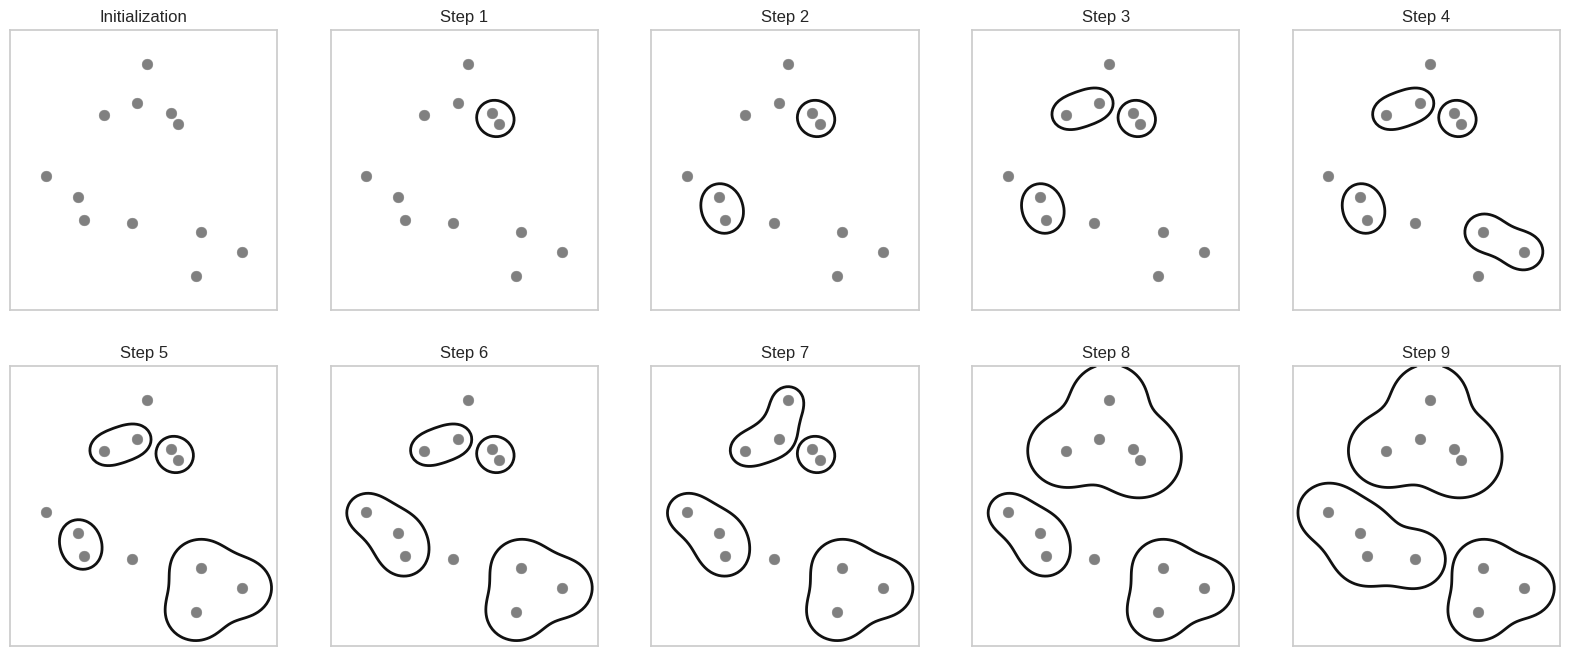

In [2]:
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

## 덴드로그램 시각화
* 각 개체들이 결합되는 순서를 나타내는 트리형태의 다이어그램
##### <img src='../img/linkage.png' width='75%'>
##### <img src='../img/dendrogram.png' width='75%'>
* linkage 함수의 method 속성으로 각 군집간의 연결방식을 지정
    +  single/average/complete/centroid/ward
    + 최단연결single    : 각 군집을 대상으로 최소거리 기준 (가까운것부터 군집)
    + 평균연결average   : 각 군집을 대상으로 평균거리 기준
    + 최장연결complete  : 각 군집을 대상으로 최대거리 기준 (먼것부터 군집)
    + 중심연결centroid : 각 군집내 중심점 기준
    + 와드연결ward      : 군집간 SSW(응집도), SSB(분리도)간의 차이를 이용 (일정한 크기의 군집)

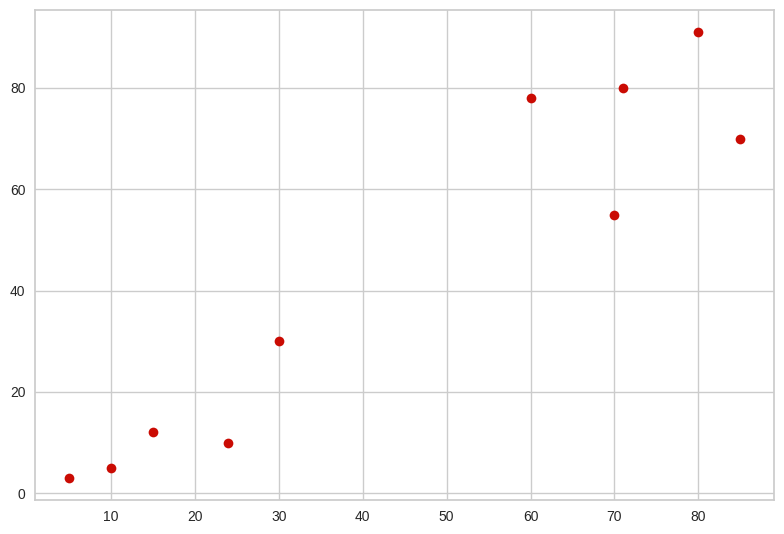

In [3]:
X = np.array([ [5,3], [10,5], [15,12],
               [24,10], [30,30], [85,70],
               [71,80], [60,78], [70,55],
               [80,91] ])

plt.plot(X[:,0], X[:,1], 'ro')
plt.tight_layout()

In [4]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

In [5]:
# 거리 계산 방식 지정
# linkage(대상, method=연결방식)
linked = linkage(X, method='single')

### 덴드로그램 시각화
* dendrogram(연결방식, 옵션)

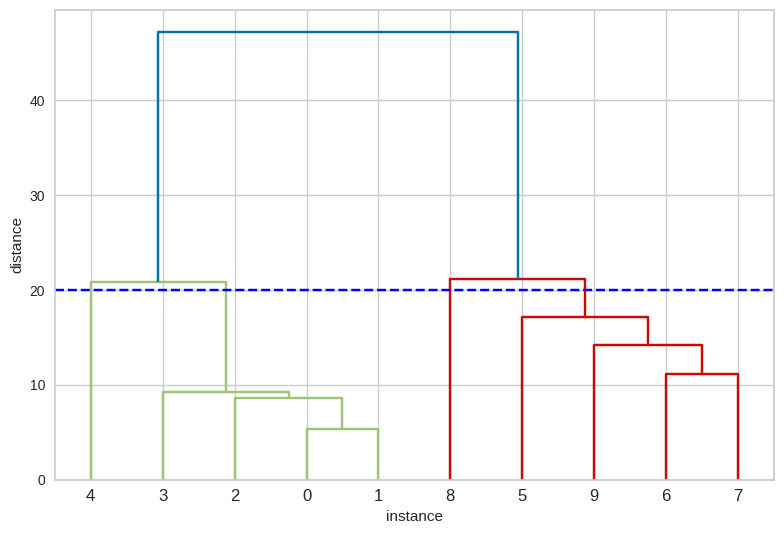

In [6]:
dendrogram(linked)
plt.xlabel('instance') # 개체
plt.ylabel('distance') # 군집간 거리
plt.axhline(20, color='blue', linestyle='dashed')
plt.tight_layout()

## 적절한 군집수 알아보기
* 덴드로그램을 보고 n개의 군집을 나눌려고 할때
  적절한 distance는 어떻게 알아볼까?
* 덴드로그램에서 밑에서 위로 올라갈수록
  군집을 의미하는 선의 갯수가 줄어둠 (응집형 군집!)
* scipy에서는 fcluster함수를 이용해서
  distance가 특정값일때 군집정보를 알려줌
     + fcluster(연결방식, 거리, 거리측정방식)

In [7]:
# 군집간 거리가 20일 때 군집의 수는?
clusters = fcluster(linked, 20, criterion='distance')
clusters

array([1, 1, 1, 1, 2, 3, 3, 3, 4, 3], dtype=int32)

In [8]:
# unique : 중복값은 제외하고 한 번씩만 출력
# count_nonzero : 0이 아닌 값들의 갯수 출력
np.count_nonzero(np.unique(clusters))

4

### 덴드로그램 시각화 - 최장거리

In [9]:
# 거리 계산 방식 지정
# linkage(대상, method=연결방식)
linked = linkage(X, method='complete')

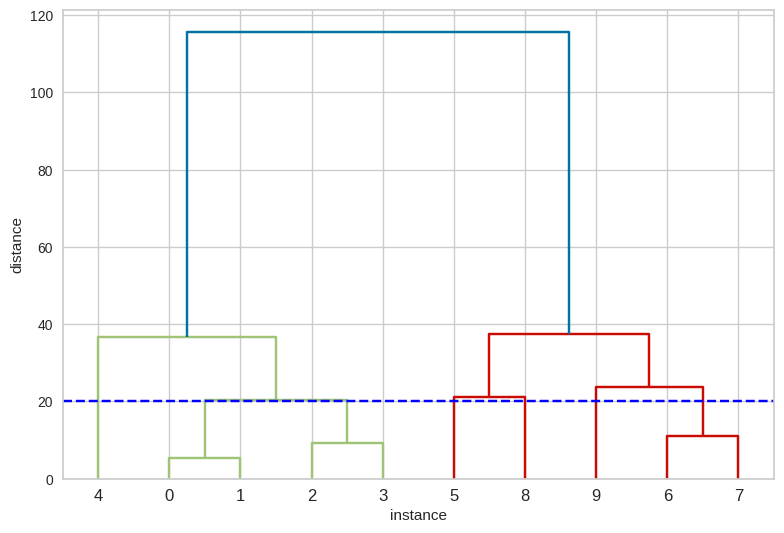

In [10]:
dendrogram(linked)
plt.xlabel('instance') # 개체
plt.ylabel('distance') # 군집간 거리
plt.axhline(20, color='blue', linestyle='dashed')
plt.tight_layout()

In [11]:
clusters = fcluster(linked, 20, criterion='distance')
clusters

array([1, 1, 2, 2, 3, 4, 6, 6, 5, 7], dtype=int32)

In [12]:
np.count_nonzero(np.unique(clusters))

7

### iris 데이터셋을 이용한 계층형 군집 분석

In [13]:
iris = load_iris()
data = iris.data
target = iris.target

In [14]:
# linked = linkage(data, method='single')
# linked = linkage(data, method='complete')
# linked = linkage(data, method='average')
# linked = linkage(data, method='centroid')
linked = linkage(data, method='ward')

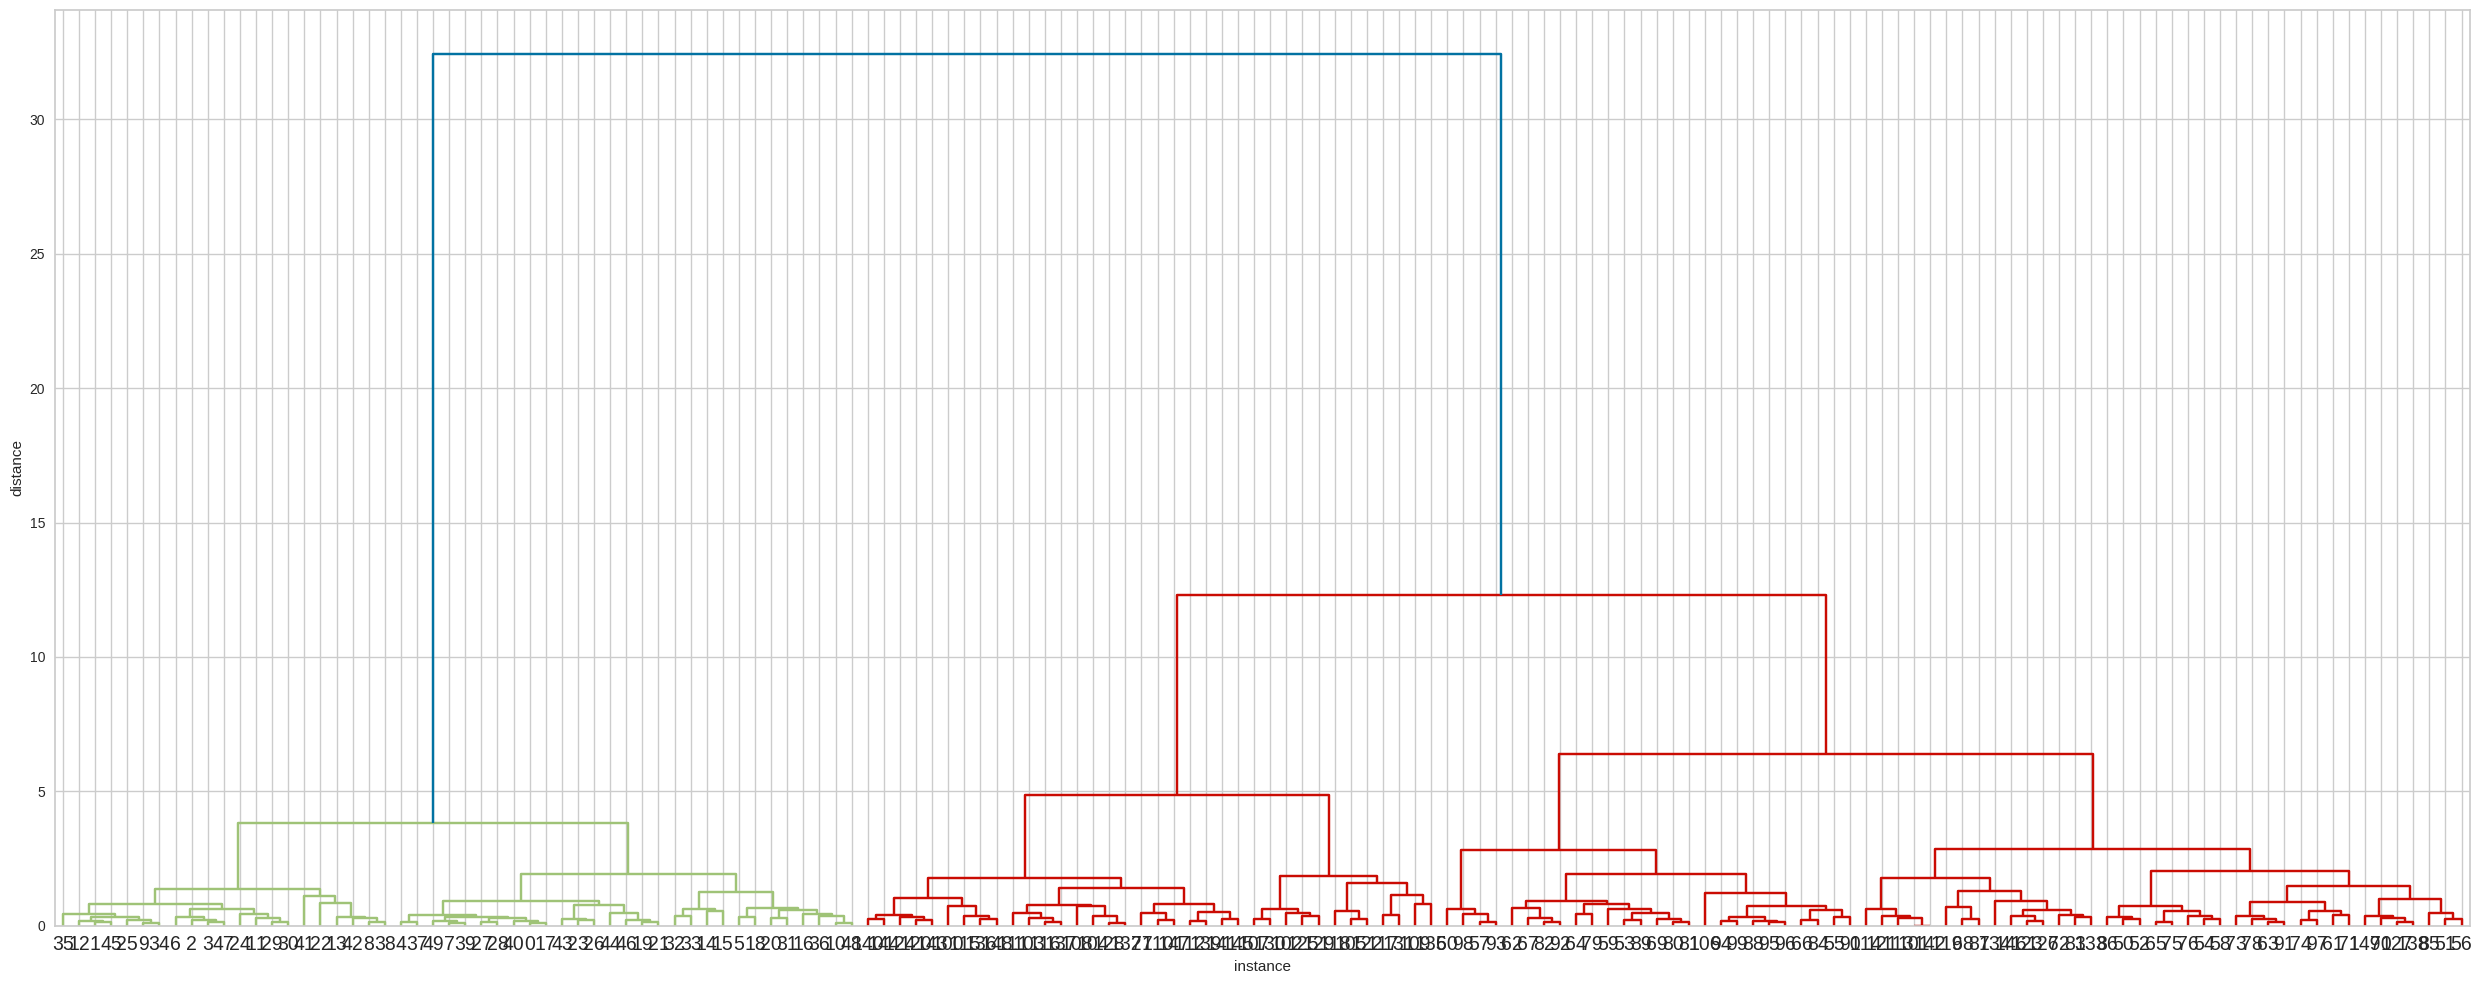

In [15]:
plt.figure(figsize=(25,10))
dendrogram(linked, leaf_font_size=14, leaf_rotation=0)
plt.xlabel('instance') # 개체
plt.ylabel('distance') # 군집간 거리
plt.tight_layout()

In [16]:
# 군집간 거리측정방식을 ward로 했을 때
# 3개의 군집으로 나눌 경우 군집간 거리는?
clusters = fcluster(linked, 6.4, criterion='distance')
np.count_nonzero(np.unique(clusters))

3

In [17]:
clusters = fcluster(linked, 12.3, criterion='distance')
np.count_nonzero(np.unique(clusters))

3

### iris를 이용한 응집형 군집분석
+ AgglomerativeClustering(군집수, 거리측정방식, 연결방식)
+ affinity : 거리측정방식 (euclidean, mahattan, cosine등)

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
groups = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
groups.fit(data)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [20]:
# 군집 결과 확인
groups.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

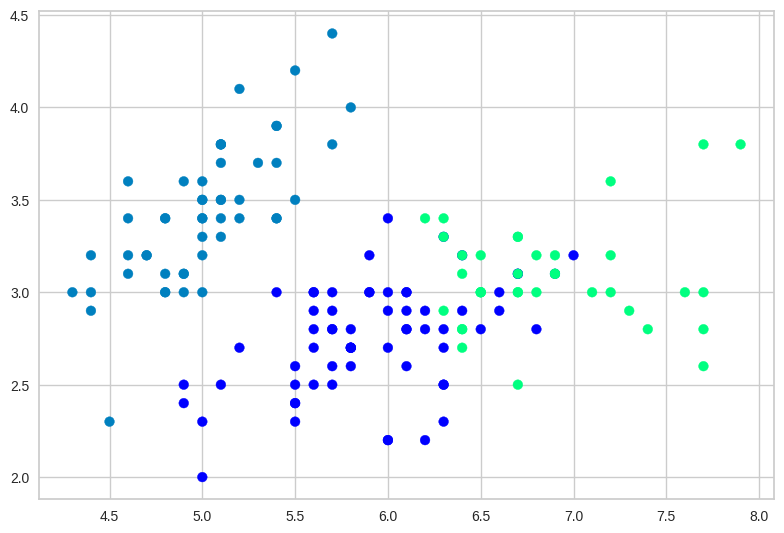

In [21]:
# sl, sw
plt.scatter(data[:, 0], data[:, 1], c=groups.labels_, cmap='winter')
plt.tight_layout()

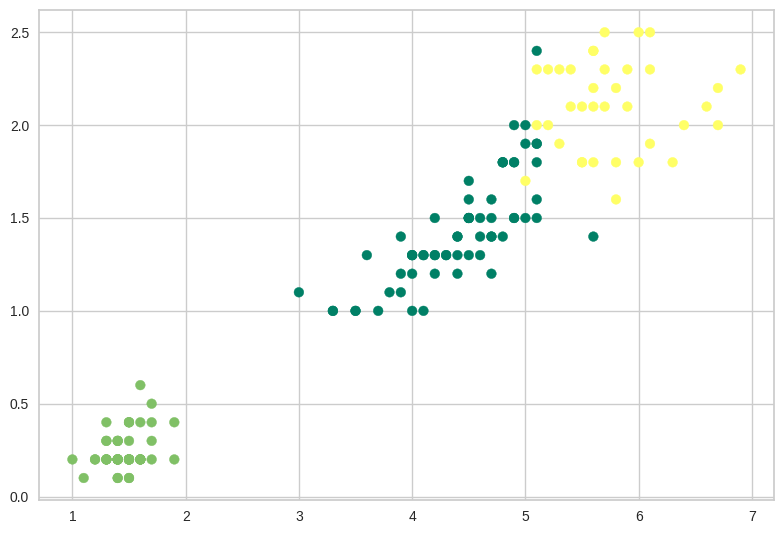

In [22]:
# pl, pw
plt.scatter(data[:, 2], data[:, 3], c=groups.labels_, cmap='summer')
plt.tight_layout()

### 실루엣 계수 확인

In [23]:
silhouette_score(data[:, :2], groups.labels_)

0.3576978019804449

In [24]:
silhouette_score(data[:, 2:], groups.labels_)

0.6398270745578704

### 실루엣 계수 시각화
* 응집형 군집은 SilhouetteVisualizer로는 확인 불가!

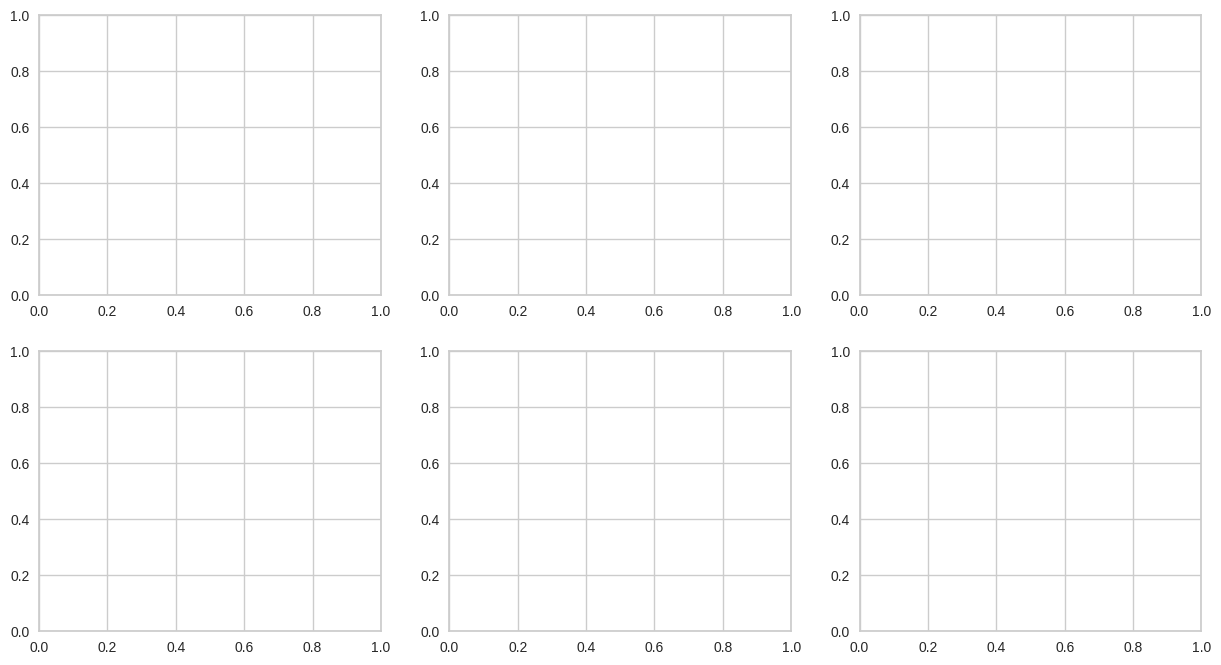

In [25]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
for k in [2,3,4,5,6,7]:
    ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
    q, mod = divmod(k+1, 3)
    visualizer = SilhouetteVisualizer(ac, ax=ax[q-1][mod])
    visualizer.fit_predict(data)

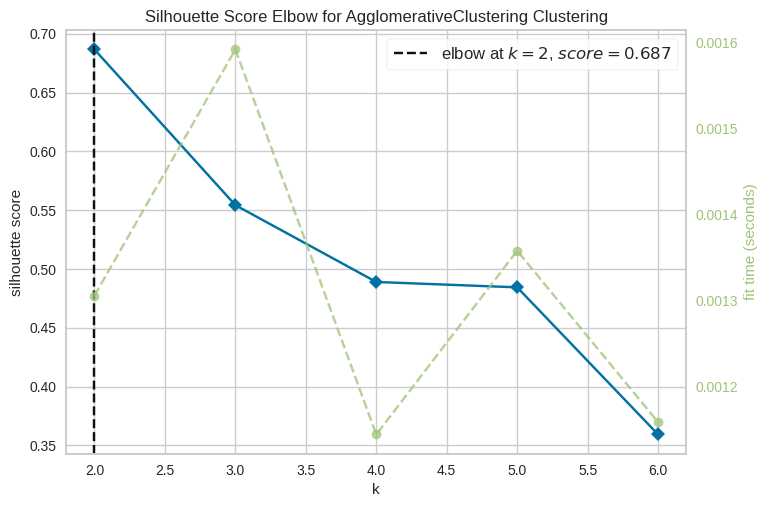

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward')
viszr = KElbowVisualizer(ac, k=(2,7), 
                         # metric='calinski_harabasz', timings=False)
                         metric='silhouette', timings=True)
viszr.fit(data)
viszr.show()